### This script contains the following points:

#### 1. Importing libraries and full_merge data
#### 2. Checking for personally identifiable information (PII)
#### 3. Create Region column for each state
#### 4. Flag and remove low activity users
#### 5. Create customer profiles
#### 6. Visualizations of customer profiles
#### 7. Aggregations for customer profiles
#### 8. Regions and departments
#### 9. Export data and visuals

# 1. Importing libraries and full_merge data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# complete data set including orders, products, and customers

full_merge = pd.read_pickle(r'C:\Users\kevan\Documents\Career Foundry\Data Immersion\Achievement 4\Instacart Basket Analysis\02 Data\Prepared Data\full_merge.pkl')

In [3]:
# assigning main project path to variable 'path'

path = r'C:\Users\kevan\Documents\Career Foundry\Data Immersion\Achievement 4\Instacart Basket Analysis'

In [4]:
# expanding column view

pd.set_option('display.max_columns', 35)

In [5]:
# expanding row view

pd.set_option('display.max_rows', None)

# 2. Checking for personally identifiable information (PII)

In [6]:
# checking headers and first row of data to detect any PII

full_merge.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_prior_order,frequency_flag,First Name,Surname,Sex,State,Age,Date Joined,Number Dependents,Family Status,Income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


### First name and Surname are PII. These columns will need to be removed to protect user privacy.

In [4]:
# dropping columns that contain PII

full_merge.drop(['First Name', 'Surname'], axis = 1, inplace = True)

In [8]:
# verifying that columns were dropped

full_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_days_prior_order', 'frequency_flag', 'Sex',
       'State', 'Age', 'Date Joined', 'Number Dependents', 'Family Status',
       'Income'],
      dtype='object')

# 3. Create Region column for each state

In [5]:
# defining each region and creating a list of states

Region_1 = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [6]:
Region_2 = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [7]:
Region_3 = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [8]:
Region_4 = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [9]:
# creating a condition that does NOT overwrite the previous condition. if conditions not met, value is NaN

full_merge['Region'] = full_merge['State'].apply(lambda x: 'Region 1' if x in Region_1 else
                                                 'Region 2' if x in Region_2 else
                                                 'Region 3' if x in Region_3 else
                                                 'Region 4' if x in Region_4 else np.nan)

In [14]:
# verifying that all regions have counts and that they add up to the number of rows in dataframe

full_merge.value_counts('Region')

Region
Region 3    10791885
Region 4     8292913
Region 2     7597325
Region 1     5722736
dtype: int64

In [15]:
# verifying that Region column was added

full_merge.shape

(32404859, 30)

## Compare Region values using crosstab
### Region 3 has the most high spenders AND low spenders

In [16]:
# creating a crosstab for spending flag and Regions to see results in Excel

cross_tab = pd.crosstab(full_merge['spending_flag'], full_merge['Region'], dropna = False)

In [17]:
# copying results to clipboard to be pasted into Excel

cross_tab.to_clipboard()

# 4. Flag and remove low activity users

In [10]:
# low activity users have less than 5 max orders

result = []

for value in full_merge["max_order"]:
    if value < 5:
        result.append("low_activity")
    else:
        result.append("NA")
full_merge["exclusion"] = result

In [13]:
# verify that flags are labeled correctly

full_merge['exclusion'].value_counts()

NA              30964564
low_activity     1440295
Name: exclusion, dtype: int64

### Remove high activity users to create a low activity user sample

In [14]:
# users that are not flagged as 'NA' are low activity

low_activity_users = full_merge[full_merge.exclusion != 'NA']

In [15]:
# verify that only low activity users included

low_activity_users['exclusion'].value_counts()

low_activity    1440295
Name: exclusion, dtype: int64

### Exporting low activity user sample to pkl in case it's needed later

In [22]:
low_activity_users.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_users.pkl'))

### Remove low activity users from the dataframe

In [11]:
# users that are not labeled as 'low_activity' are kept in full_merge

full_merge = full_merge[full_merge.exclusion != 'low_activity']

In [17]:
#verify that number of rows is reduced by the number of low activity usrs that were removed

full_merge.shape

(30964564, 31)

In [12]:
# removing exclusion column (axis =1) from df

full_merge = full_merge.drop(['exclusion'], axis =1)

In [19]:
# verify that exclusion column was removed

full_merge.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days_prior_order,frequency_flag,Sex,State,Age,Date Joined,Number Dependents,Family Status,Income,Region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region 3


# 5. Create customer profiles

## Generate parent flag based on number of dependents per user

In [13]:
# No dependents = 0, else result is a parent. 

result = []

for value in full_merge["Number Dependents"]:
    if value == 0:
        result.append("no dependents")
    else:
        result.append("parent")
full_merge["Parent_Flag"] = result

In [14]:
# verify that new column and values successfully created

full_merge.value_counts('Parent_Flag')

Parent_Flag
parent           23224883
no dependents     7739681
dtype: int64

## Generate age profile flag based on user age

In [15]:
# young is 18 to 35, middle-aged is 36 to 61, senior is older than 62

full_merge.loc[full_merge['Age'] <= 35, 'Age_Profile'] = 'Young'
full_merge.loc[(full_merge['Age'] > 35) & (full_merge['Age'] <= 62), 'Age_Profile'] = 'Middle-Aged'
full_merge.loc[full_merge['Age'] > 62, 'Age_Profile'] = 'Senior'

In [30]:
# verify Age_Profile correctly labeled

full_merge.value_counts('Age_Profile')

Age_Profile
Middle-Aged    13050626
Senior          9175133
Young           8738805
dtype: int64

### Middle-aged users are more loyal

In [31]:
# creating a crosstab for loyalty flag and age profile

age_loyal_tab = pd.crosstab(full_merge['loyalty_flag'], full_merge['Age_Profile'], dropna = False)

In [32]:
age_loyal_tab.to_clipboard()

### Seniors spend more

In [33]:
# creating a crosstab for spending flag and age profile'

spend_age_tab = pd.crosstab(full_merge['spending_flag'], full_merge['Age_Profile'], dropna = False)

In [34]:
spend_age_tab.to_clipboard()

### Married users spend more

In [35]:
# creating a crosstab for spending flag and family status

spend_family_tab = pd.crosstab(full_merge['spending_flag'], full_merge['Family Status'], dropna = False)

In [36]:
spend_family_tab.to_clipboard()

## Importing and merging department data to full_merge

In [16]:
# importing department data

departments = pd.read_csv(r'C:\Users\kevan\Documents\Career Foundry\Data Immersion\Achievement 4\Instacart Basket Analysis\02 Data\Prepared Data\departments_wrangled.csv')

In [17]:
# renaming index as department_id so departments df can be merged onto full_merge df

departments = departments.rename(columns={'Unnamed: 0' : 'department_id'})
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [18]:
# changing department_id from int to str so that it can merge onto full_merge df

departments = departments.astype({"department_id": 'str'})

In [19]:
# merge dataframes using department id as key

full_merge = full_merge.merge(departments, on = 'department_id')

### Produce most popular regardless of loyalty status

In [41]:
# creating a crosstab for loyalty flag and department IDs
loyal_tab = pd.crosstab(full_merge['loyalty_flag'], full_merge['department_id'], dropna = False)

In [42]:
loyal_tab.to_clipboard()

## Create Data Dictionary for Departments 

In [43]:
data_dict = departments.to_dict('index')
data_dict

{0: {'department_id': '1', 'department': 'frozen'},
 1: {'department_id': '2', 'department': 'other'},
 2: {'department_id': '3', 'department': 'bakery'},
 3: {'department_id': '4', 'department': 'produce'},
 4: {'department_id': '5', 'department': 'alcohol'},
 5: {'department_id': '6', 'department': 'international'},
 6: {'department_id': '7', 'department': 'beverages'},
 7: {'department_id': '8', 'department': 'pets'},
 8: {'department_id': '9', 'department': 'dry goods pasta'},
 9: {'department_id': '10', 'department': 'bulk'},
 10: {'department_id': '11', 'department': 'personal care'},
 11: {'department_id': '12', 'department': 'meat seafood'},
 12: {'department_id': '13', 'department': 'pantry'},
 13: {'department_id': '14', 'department': 'breakfast'},
 14: {'department_id': '15', 'department': 'canned goods'},
 15: {'department_id': '16', 'department': 'dairy eggs'},
 16: {'department_id': '17', 'department': 'household'},
 17: {'department_id': '18', 'department': 'babies'},
 1

#### Subset df_1 for Age_Profile, Parent_Flag, & product_name

In [60]:
# creating subset of df to speed up visual processing by only selecting necessary columns

df_1 = full_merge[['Age_Profile', 'Parent_Flag', 'product_name', 'order_hour_of_day']]

## Filtered subset by age and dependents to find departments and products with highest counts.
### Bananas most popular for all ages and parents/no dependents.

In [58]:
df_1[['Age_Profile', 'product_name']].value_counts()

Age_Profile  product_name                   
Middle-Aged  Banana                             191988
             Bag of Organic Bananas             154281
Senior       Banana                             133181
Young        Banana                             127995
Senior       Bag of Organic Bananas             109735
                                                 ...  
Young        Chili with Beans, Vegetarian            1
             Simply Good Strawberry Gelatin          1
             Simply Good Vanilla Pudding Mix         1
             Chili with Beans Pot Pie                1
Senior       L'Orange Vodka                          1
Length: 142970, dtype: int64

In [59]:
df_1[['Parent_Flag', 'product_name']].value_counts()

Parent_Flag    product_name                                        
parent         Banana                                                  339554
               Bag of Organic Bananas                                  274617
               Organic Strawberries                                    191533
               Organic Baby Spinach                                    173844
               Organic Hass Avocado                                    154554
                                                                        ...  
no dependents  Probiotics High Potency Capsules                             1
               Cut Asparagus Spears                                         1
               Probiotic & Prebiotic Supplement, Flavorless                 1
               Proactive Health Mature Adult Hairball Care Cat Food         1
               Gluten Free Pizza Dough Ball                                 1
Length: 96064, dtype: int64

In [22]:
# creating subset for young parents

young_p = df_1[(df_1.Age_Profile == 'Young') & (df_1.Parent_Flag == 'parent')]

In [23]:
young_p['product_name'].value_counts

<bound method IndexOpsMixin.value_counts of 0                                 Soda
1                                 Soda
2                                 Soda
3                                 Soda
4                                 Soda
                       ...            
30964431                      Apricots
30964439    Organic Black Mission Figs
30964452    Organic Black Mission Figs
30964498                   Dried Mango
30964499                   Dried Mango
Name: product_name, Length: 6561115, dtype: object>

In [61]:
# creating subset for young no dependents

young_n = df_1[(df_1.Age_Profile == 'Young') & (df_1.Parent_Flag != 'parent')]

In [25]:
young_n['product_name'].value_counts

<bound method IndexOpsMixin.value_counts of 617                               Soda
618                               Soda
619                  Zero Calorie Cola
620                  Zero Calorie Cola
621                      Coconut Water
                       ...            
30964408    Organic Black Mission Figs
30964428         Organic White Popcorn
30964429         Organic White Popcorn
30964451    Organic Brown Jasmine Rice
30964456              Israeli Couscous
Name: product_name, Length: 2177690, dtype: object>

In [26]:
# verify that subsets equal to total young users

len(young_p + young_n)

8738805

In [27]:
# creating subset for middle-aged parents

middle_p = df_1[(df_1.Age_Profile == 'Middle-Aged') & (df_1.Parent_Flag == 'parent')]

In [28]:
middle_p['product_name'].value_counts

<bound method IndexOpsMixin.value_counts of 33                         Soda
34                         Soda
35                         Soda
36          Coke Zero Diet Soda
37          Coke Zero Diet Soda
                   ...         
30964550            Dried Mango
30964551            Dried Mango
30964552            Dried Mango
30964557            Dried Mango
30964563               Apricots
Name: product_name, Length: 9774447, dtype: object>

In [29]:
# creating subset for middle-aged no dependents

middle_n = df_1[(df_1.Age_Profile == 'Middle-Aged') & (df_1.Parent_Flag != 'parent')]

In [30]:
middle_n['product_name'].value_counts

<bound method IndexOpsMixin.value_counts of 563                                                   Soda
564                                  Sparkling Lemon Water
565                                  Sparkling Lemon Water
566                                                   Cola
567         Slim Can Pink Grapefruit Natural Mineral Water
                                 ...                      
30964529                                       Dried Mango
30964530                                       Dried Mango
30964531                                       Dried Mango
30964544                                       Dried Mango
30964545                                       Dried Mango
Name: product_name, Length: 3276179, dtype: object>

In [31]:
# verify that subsets equal to total middle-aged users

len(middle_p + middle_n)

13050626

In [32]:
# creating subset for senior parents

senior_p = df_1[(df_1.Age_Profile == 'Senior') & (df_1.Parent_Flag == 'parent')]

In [33]:
senior_p['product_name'].value_counts

<bound method IndexOpsMixin.value_counts of 189                Soda
190                Soda
191                Soda
192                Soda
193                Soda
               ...     
30964558    Dried Mango
30964559    Dried Mango
30964560    Dried Mango
30964561    Dried Mango
30964562    Dried Mango
Name: product_name, Length: 6889321, dtype: object>

In [34]:
# creating subset for senior no dependents

senior_n = df_1[(df_1.Age_Profile == 'Senior') & (df_1.Parent_Flag != 'parent')]

In [35]:
senior_n['product_name'].value_counts

<bound method IndexOpsMixin.value_counts of 13                     Soda
14                     Soda
15                     Soda
16                     Soda
17                     Soda
                 ...       
30964543        Dried Mango
30964553        Dried Mango
30964554        Dried Mango
30964555        Dried Mango
30964556    Vegetable Chips
Name: product_name, Length: 2285812, dtype: object>

In [36]:
# verify that subsets equal to total senior users

len(senior_p + senior_n)

9175133

# 6. Visualizations of customer profiles

#### Subset df_2 for Age_Profile, Parent_Flag, department_id, Loyalty_flag, & Family Status

In [4]:
df_2 = full_merge[['Age_Profile', 'Parent_Flag', 'department', 'loyalty_flag', 'Family Status']]

### Produce dept (#4) most popular regardless of age, parents/no dependents, loyalty status, and family status

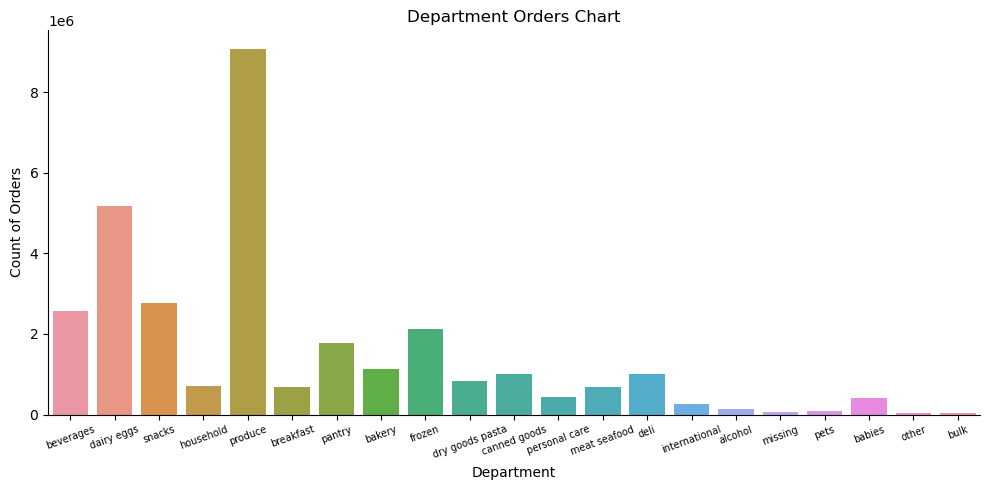

In [5]:
# bar chart showing counts for each department
# reduced font size to keep x labels from overlapping

dept_bar = sns.catplot(data=df_2, kind="count", x="department", aspect = 2)
plt.xticks(rotation = 20, fontsize=7)
plt.xlabel('Department')
plt.ylabel('Count of Orders')
plt.title('Department Orders Chart')
plt.tight_layout() # added to keep x axis label for being cut off after export
plt.show()

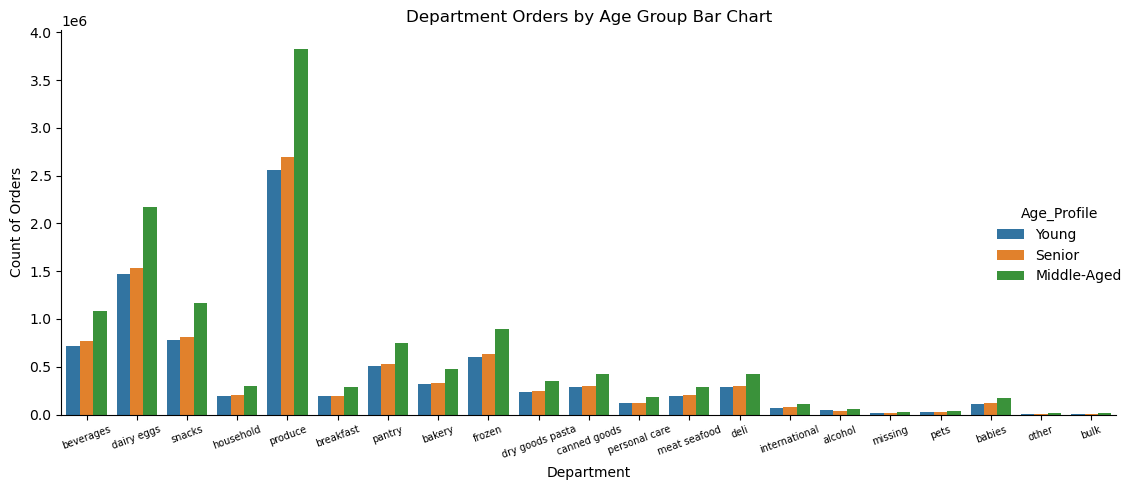

In [7]:
# bar chart showing counts for each department by age profile

dept_age_bar = sns.catplot(data=df_2, kind="count", x="department", hue= "Age_Profile", aspect = 2)
plt.xticks(rotation = 20, fontsize=7)
plt.xlabel('Department')
plt.ylabel('Count of Orders')
plt.title('Department Orders by Age Group Bar Chart')
plt.tight_layout()
plt.show()

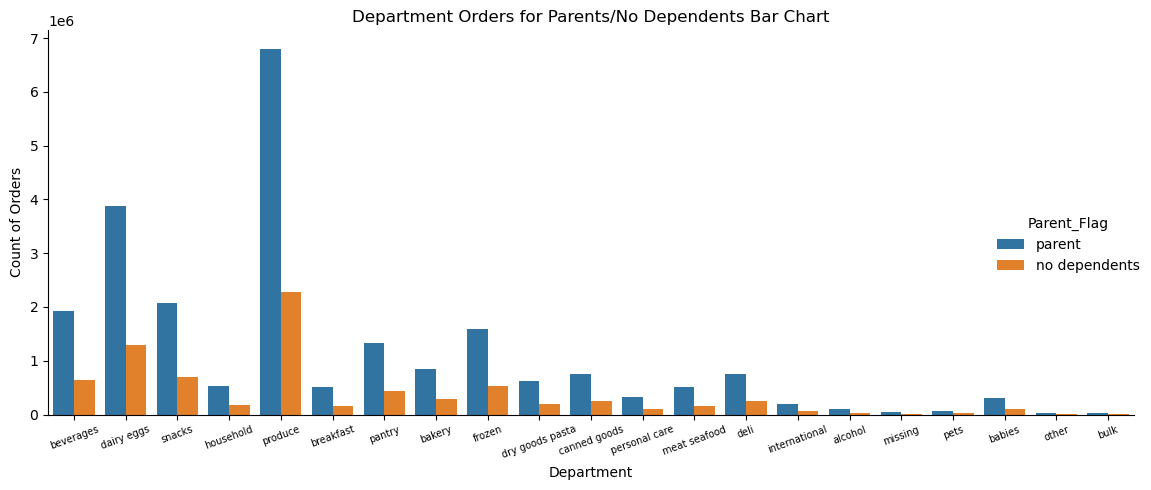

In [8]:
# bar chart showing counts for each department by parent flag

dept_parent_bar = sns.catplot(data=df_2, kind = 'count', x="department", hue="Parent_Flag", aspect = 2)
plt.xticks(rotation = 20, fontsize=7)
plt.xlabel('Department')
plt.ylabel('Count of Orders')
plt.title('Department Orders for Parents/No Dependents Bar Chart')
plt.tight_layout()
plt.show()

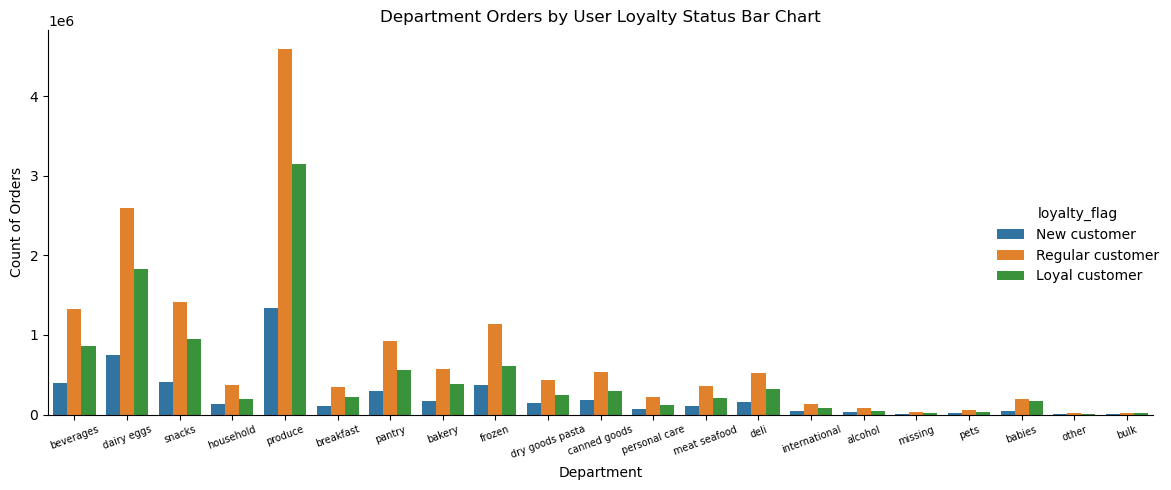

In [16]:
# bar chart showing counts for each department by loyalty flag

dept_loyal_bar = sns.catplot(data=df_2, kind = 'count', x="department", hue="loyalty_flag", aspect = 2)
plt.xticks(rotation = 20, fontsize=7)
plt.xlabel('Department')
plt.ylabel('Count of Orders')
plt.title('Department Orders by User Loyalty Status Bar Chart')
plt.tight_layout()
plt.show()

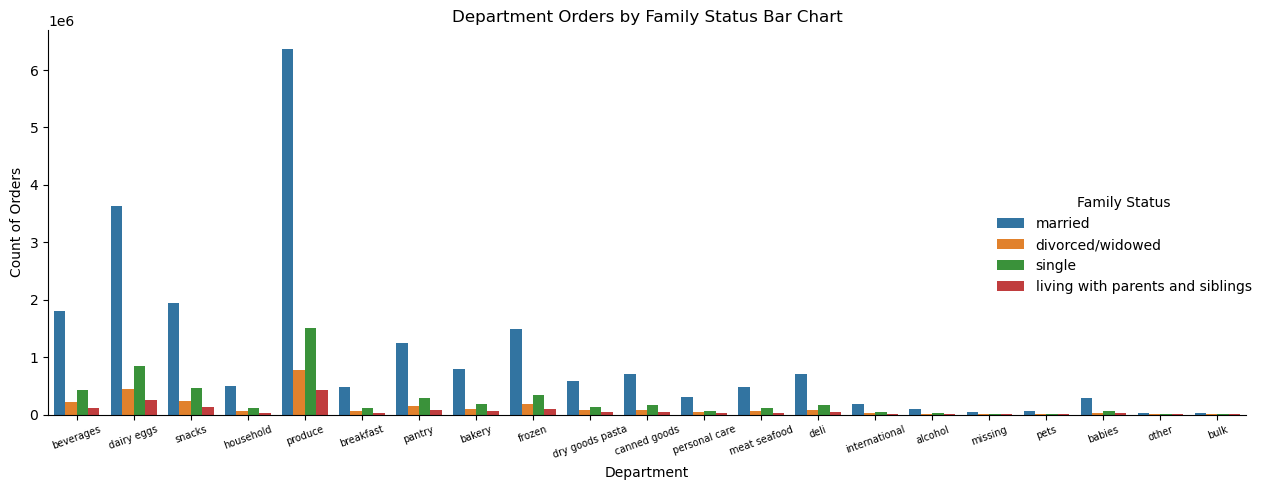

In [17]:
# bar chart showing counts for each department by family status

dept_fam_bar = sns.catplot(data=df_2, kind = 'count', x='department', hue='Family Status', aspect = 2)
plt.xticks(rotation = 20, fontsize=7)
plt.xlabel('Department')
plt.ylabel('Count of Orders')
plt.title('Department Orders by Family Status Bar Chart')
plt.tight_layout()
plt.show()

## Boxplot of income and age profiles
### Seniors have the highest income among all age groups. No difference between parents and no dependents.

#### Subset df_3 for Age_Profile, Parent_flag, Income

In [52]:
df_3 = full_merge[['Age_Profile', 'Parent_Flag', 'Income']]

Text(0.5, 1.0, 'Age Profile and Parent/No Dependent Incomes Boxplot')

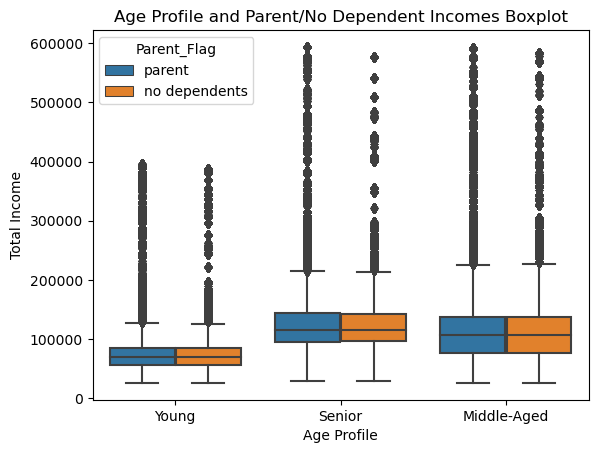

In [53]:
# boxplot of age profiles against income. color distinguishes parents and no dependents

inc_allage_box = sns.boxplot(data = df_3, x = 'Age_Profile', y = 'Income', hue = 'Parent_Flag')
plt.xlabel('Age Profile')
plt.ylabel('Total Income')
plt.title('Age Profile and Parent/No Dependent Incomes Boxplot')

## Bar chart of number of users and their loyalty status
### Regular customers make up most of Instacart users

Text(9.444444444444445, 0.5, 'Count of Users')

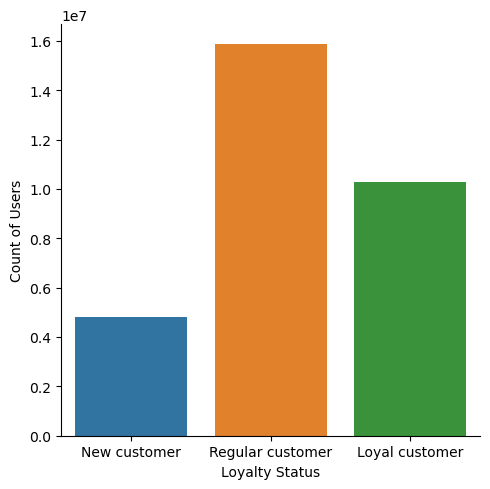

In [54]:
# count of each loyalty status for all users

loyal_bar = sns.catplot(data=df_2,x='loyalty_flag', kind='count')
plt.xlabel('Loyalty Status')
plt.ylabel('Count of Users')

### Single users proportionately more loyal

In [ ]:
# creating a crosstab for loyalty flag and family status

fam_loyal_tab = pd.crosstab(full_merge['loyalty_flag'], full_merge['Family Status'], dropna = False)

In [ ]:
fam_loyal_tab.to_clipboard()

### Low spenders are more loyal

In [ ]:
# creating a crosstab for loyalty flag and spending flag

spend_loyal_tab = pd.crosstab(full_merge['loyalty_flag'], full_merge['spending_flag'], dropna = False)

In [ ]:
spend_loyal_tab.to_clipboard()

## Bar chart of number of users flagged as Parents or No Dependents
### Middle-aged parents make up the majority of Instacart users

(array([0, 1]), [Text(0, 0, 'parent'), Text(1, 0, 'no dependents')])

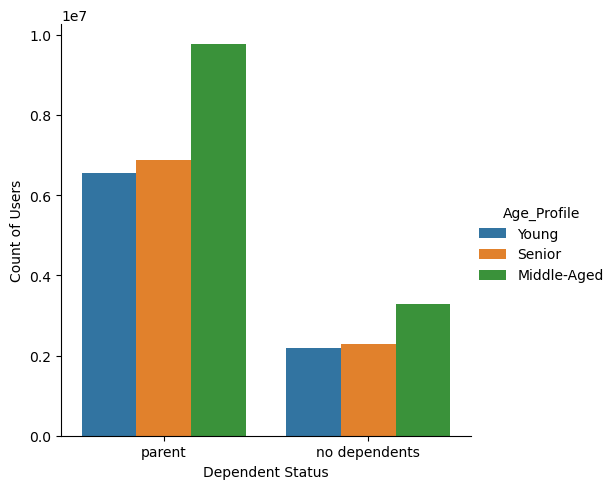

In [55]:
# count of each parent flag. color distinguishes age groups

parent_age_bar = sns.catplot(data=df_1,x='Parent_Flag', kind='count', hue= 'Age_Profile')
plt.xlabel('Dependent Status')
plt.ylabel('Count of Users')
plt.xticks(rotation = 360)

## Most popular days and times among age groups
### Saturday and Sunday are the most popular among all users. No difference between age groups and parents/no dependents.

#### Subset df_4 for Age_Profile, Parent_Flag, orders_day_of_week, order_hour_of_day

In [39]:
df_4 = full_merge[['Age_Profile', 'Parent_Flag', 'orders_day_of_week', 'order_hour_of_day']]

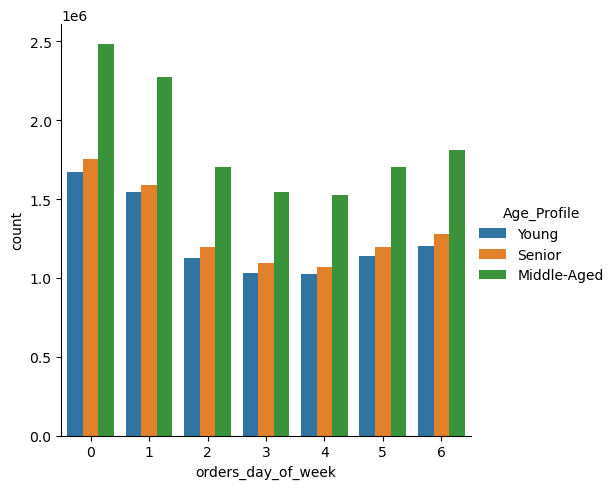

In [40]:
# bar chart of counts of day of week for age groups

DOW_age_bar = sns.catplot(data=df_4, x='orders_day_of_week', kind='count', aspect=1, hue = 'Age_Profile')

Text(0.5, 1.0, 'Orders for Parents/No Dependents by Day of Week Histogram')

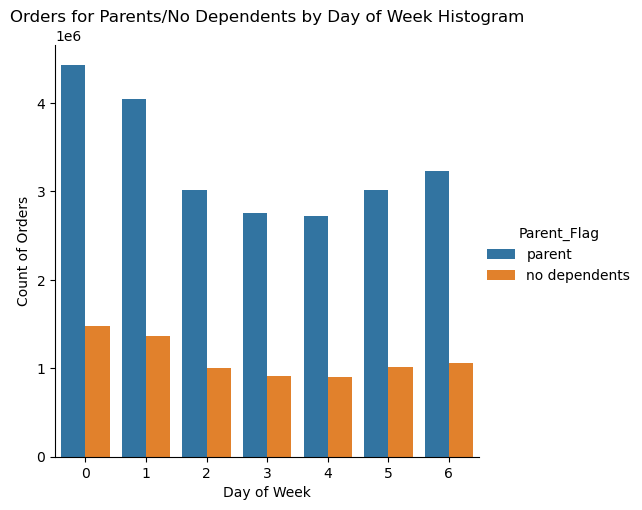

In [41]:
# bar chart of counts of day of week for parents and no dependents

DOW_parent_bar= sns.catplot(data=df_4, x='orders_day_of_week', kind='count', aspect=1, hue = 'Parent_Flag')
plt.xlabel('Day of Week')
plt.ylabel('Count of Orders')
plt.title('Orders for Parents/No Dependents by Day of Week Histogram')

### 10am most popular time for all users, except for young users with no dependents who prefer 11am

Text(0.5, 1.0, 'Orders for Age Groups by Hour of Day Histogram')

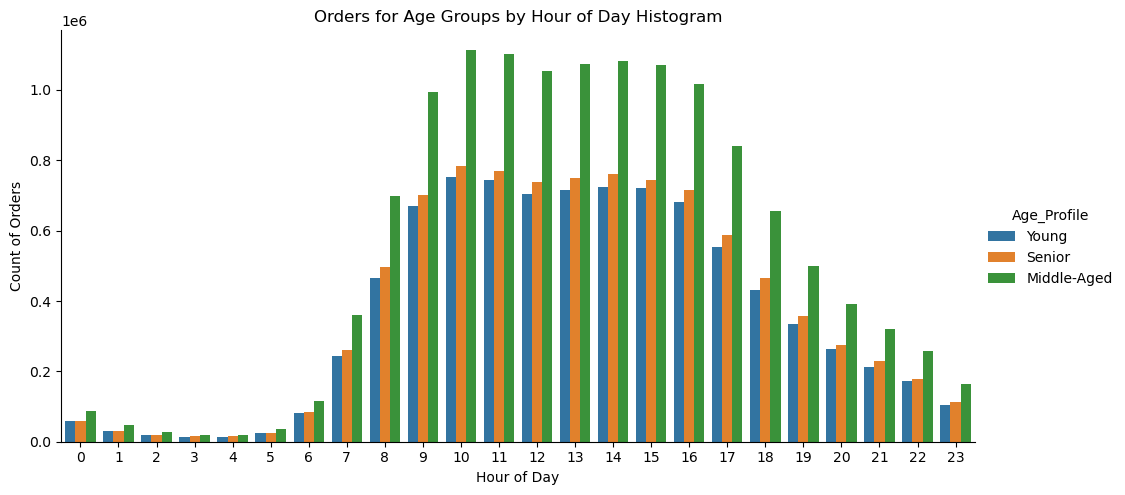

In [42]:
# bar chart of counts for hour of day for age groups

time_age_bar = sns.catplot(data=df_4, x='order_hour_of_day', kind='count', aspect=2, hue = 'Age_Profile')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Orders')
plt.title('Orders for Age Groups by Hour of Day Histogram')

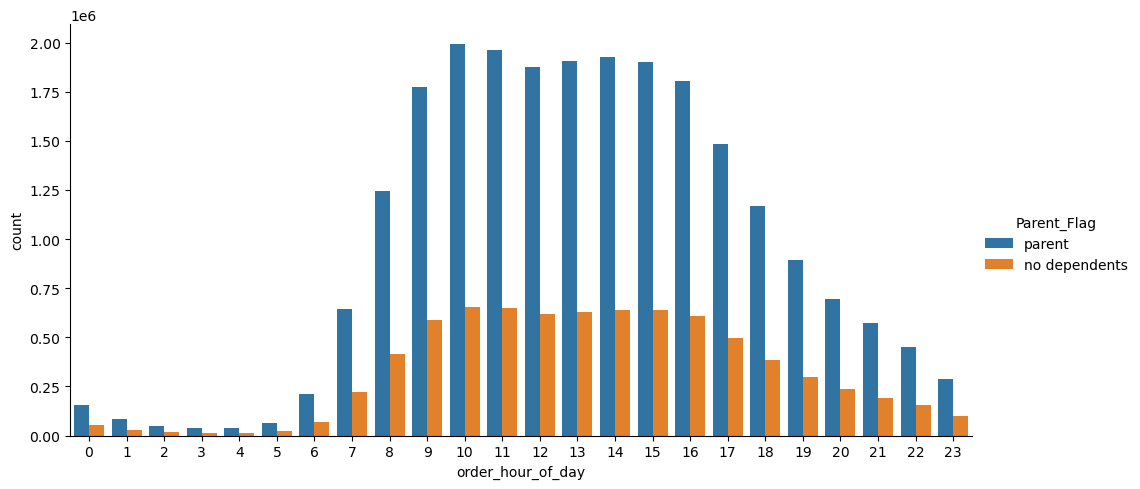

In [43]:
# bar chart of counts for hour of day for parents and no dependents

time_parent_bar = sns.catplot(data=df_4, x='order_hour_of_day', kind='count', aspect=2, hue = 'Parent_Flag')

### Young users with no dependents prefer to shop at 11am

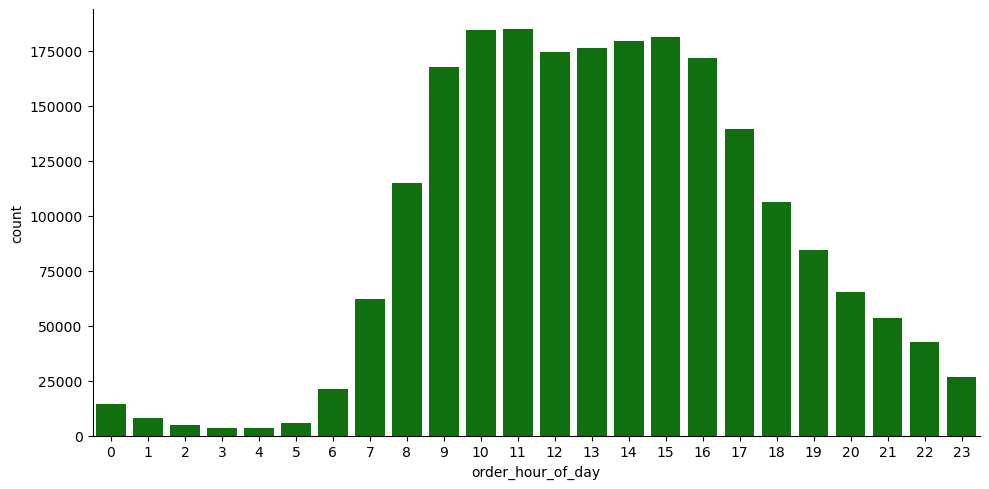

In [62]:
# bar chart of counts for hour of day for young and no dependents

time_yn_bar = sns.catplot(data=young_n, x='order_hour_of_day', kind='count', aspect=2, color = 'green')

In [63]:
# counts per hour to better detect which hour is most popular

young_n.value_counts('order_hour_of_day')

order_hour_of_day
11    184855
10    184683
15    181411
14    179689
13    176150
12    174601
16    171673
9     167715
17    139630
8     114817
18    106097
19     84548
20     65371
7      62295
21     53649
22     42586
23     26724
6      21050
0      14525
1       7880
5       5894
2       4697
4       3671
3       3479
dtype: int64

# 7. Aggregations for Customer Profiles

### Measures (max, min, mean): 
               Prices
               Income
               Max order
               Median days since prior order
### Profiles: 
               Age groups
               Parents / No dependents 
               High / low spenders
               Frequent / Regular / Non Frequent users
               Loyal / Regular / New users

### Age Groups

In [64]:
# naming each aggregation to avoid overwriting full_merge df
age_groups = full_merge.groupby('Age_Profile').agg({'prices': ['mean', 'max', 'min'], 'Income': ['mean', 'max', 'min'], 'max_order': ['mean', 'max', 'min'], 'median_days_prior_order': ['mean', 'max', 'min']})
age_groups

prices                    Income                 max_order      \
                 mean   max  min           mean     max    min       mean max   
Age_Profile                                                                     
Middle-Aged  7.791445  25.0  1.0  107650.738025  592409  25903  34.504716  99   
Senior       7.795417  25.0  1.0  115990.045038  593901  29001  34.378952  99   
Young        7.784246  25.0  1.0   70637.357613  396364  25911  34.356734  99   

                median_days_prior_order             
            min                    mean   max  min  
Age_Profile                                         
Middle-Aged   5                9.972117  30.0  0.0  
Senior        5                9.926423  30.0  0.0  
Young         5                9.967022  30.0  0.0

### Parents / No Dependents

In [65]:
dependents = full_merge.groupby(['Age_Profile', 'Parent_Flag']).agg({'prices': ['mean', 'max', 'min'], 'Income': ['mean', 'max', 'min'], 'max_order': ['mean', 'max', 'min'], 'median_days_prior_order': ['mean', 'max', 'min']})
dependents

prices                    Income                 \
                               mean   max  min           mean     max    min   
Age_Profile Parent_Flag                                                        
Middle-Aged no dependents  7.788908  25.0  1.0  108101.208747  584097  25903   
            parent         7.792295  25.0  1.0  107499.750176  592409  25941   
Senior      no dependents  7.799225  25.0  1.0  116066.944808  576876  29011   
            parent         7.794154  25.0  1.0  115964.530417  593901  29001   
Young       no dependents  7.780359  25.0  1.0   70580.869956  387860  25979   
            parent         7.785536  25.0  1.0   70656.106347  396364  25911   

                           max_order         median_days_prior_order        \
                                mean max min                    mean   max   
Age_Profile Parent_Flag                                                      
Middle-Aged no dependents  35.006773  99   5                9.915043  30.0   
            parent         34.336438  99   5                9.991247  30.0   
Senior      no dependents  34.613354  99   5                9.862679  30.0   
            parent         34.301180  99   5                9.947572  30.0   
Young       no dependents  34.243558  99   5               10.046510  30.0   
            parent         34.394298  99   5                9.940639  30.0   

                                
                           min  
Age_Profile Parent_Flag         
Middle-Aged no dependents  0.0  
            parent         0.0  
Senior      no dependents  0.0  
            parent         0.0  
Young       no dependents  0.0  
            parent         0.0

### High / Low spenders

In [66]:
spending = full_merge.groupby(['Age_Profile', 'Parent_Flag', 'spending_flag']).agg({'prices': ['mean', 'max', 'min'], 'Income': ['mean', 'max', 'min'], 'max_order': ['mean', 'max', 'min'], 'median_days_prior_order': ['mean', 'max', 'min']})
spending

prices                    Income  \
                                             mean   max  min           mean   
Age_Profile Parent_Flag   spending_flag                                       
Middle-Aged no dependents High spender   8.433438  25.0  1.0  231989.501617   
                          Low spender    7.776593  25.0  1.0  105716.961944   
            parent        High spender   8.194270  25.0  1.0  217279.549641   
                          Low spender    7.784142  25.0  1.0  105255.275604   
Senior      no dependents High spender   8.212650  25.0  1.0  216789.784213   
                          Low spender    7.790530  25.0  1.0  113930.297459   
            parent        High spender   8.211375  25.0  1.0  235411.308908   
                          Low spender    7.785806  25.0  1.0  113555.726362   
Young       no dependents High spender   8.281582  25.0  1.0  177292.006567   
                          Low spender    7.771843  25.0  1.0   68751.670047   
            parent        High spender   8.206332  25.0  1.0  161178.798740   
                          Low spender    7.777411  25.0  1.0   68892.843961   

                                                        max_order          \
                                            max    min       mean max min   
Age_Profile Parent_Flag   spending_flag                                     
Middle-Aged no dependents High spender   584097  42263  39.295878  99   5   
                          Low spender    169992  25903  34.924229  99   5   
            parent        High spender   592409  41746  34.394471  99   5   
                          Low spender    169997  25941  34.335251  99   5   
Senior      no dependents High spender   576876  66899  37.461670  99   5   
                          Low spender    169993  29011  34.552933  99   5   
            parent        High spender   593901  61629  36.179762  99   5   
                          Low spender    169992  29001  34.263296  99   5   
Young       no dependents High spender   387860  42716  34.364741  96   5   
                          Low spender    101392  25979  34.241480  99   5   
            parent        High spender   396364  42294  36.488553  99   5   
                          Low spender    101398  25911  34.353505  99   5   

                                        median_days_prior_order             
                                                           mean   max  min  
Age_Profile Parent_Flag   spending_flag                                     
Middle-Aged no dependents High spender                 9.312011  30.0  0.0  
                          Low spender                  9.926649  30.0  0.0  
            parent        High spender                 9.808496  30.0  0.0  
                          Low spender                  9.994985  30.0  0.0  
Senior      no dependents High spender                 9.560149  30.0  1.0  
                          Low spender                  9.869097  30.0  0.0  
            parent        High spender                 9.313454  30.0  0.0  
                          Low spender                  9.960360  30.0  0.0  
Young       no dependents High spender                 9.790327  30.0  0.0  
                          Low spender                 10.050901  30.0  0.0  
            parent        High spender                 9.686443  30.0  0.0  
                          Low spender                  9.945591  30.0  0.0

### Frequent / Regular / Non-frequent customers

In [67]:
frequency = full_merge.groupby(['Age_Profile', 'Parent_Flag', 'spending_flag', 'frequency_flag']).agg({'prices': ['mean', 'max', 'min'], 'Income': ['mean', 'max', 'min'], 'max_order': ['mean', 'max', 'min'], 'median_days_prior_order': ['mean', 'max', 'min']})
frequency

prices        \
                                                                   mean   max   
Age_Profile Parent_Flag   spending_flag frequency_flag                          
Middle-Aged no dependents High spender  Frequent customer      8.354962  25.0   
                                        Non-frequent customer  8.819130  25.0   
                                        Regular customer       8.531565  25.0   
                          Low spender   Frequent customer      7.776361  25.0   
                                        Non-frequent customer  7.769705  25.0   
                                        Regular customer       7.780137  25.0   
            parent        High spender  Frequent customer      8.081530  25.0   
                                        Non-frequent customer  8.716770  25.0   
                                        Regular customer       8.319723  25.0   
                          Low spender   Frequent customer      7.787614  25.0   
                                        Non-frequent customer  7.753898  25.0   
                                        Regular customer       7.786386  25.0   
Senior      no dependents High spender  Frequent customer      8.185575  25.0   
                                        Non-frequent customer  8.529850  25.0   
                                        Regular customer       8.184715  25.0   
                          Low spender   Frequent customer      7.792956  25.0   
                                        Non-frequent customer  7.761248  25.0   
                                        Regular customer       7.795167  25.0   
            parent        High spender  Frequent customer      8.105669  25.0   
                                        Non-frequent customer  9.139030  25.0   
                                        Regular customer       8.271729  25.0   
                          Low spender   Frequent customer      7.785785  25.0   
                                        Non-frequent customer  7.788806  25.0   
                                        Regular customer       7.784587  25.0   
Young       no dependents High spender  Frequent customer      8.138195  25.0   
                                        Non-frequent customer  9.278782  25.0   
                                        Regular customer       8.359795  25.0   
                          Low spender   Frequent customer      7.793641  25.0   
                                        Non-frequent customer  7.731354  25.0   
                                        Regular customer       7.724724  25.0   
            parent        High spender  Frequent customer      8.083116  25.0   
                                        Non-frequent customer  8.751449  25.0   
                                        Regular customer       8.366202  25.0   
                          Low spender   Frequent customer      7.774852  25.0   
                                        Non-frequent customer  7.759612  25.0   
                                        Regular customer       7.792825  25.0   

                                                                    \
                                                               min   
Age_Profile Parent_Flag   spending_flag frequency_flag               
Middle-Aged no dependents High spender  Frequent customer      1.0   
                                        Non-frequent customer  1.0   
                                        Regular customer       1.0   
                          Low spender   Frequent customer      1.0   
                                        Non-frequent customer  1.0   
                                        Regular customer       1.0   
            parent        High spender  Frequent customer      1.0   
                                        Non-frequent customer  1.0   
                                        Regular customer       1.0   
                          Low spender   Frequent customer      1.

### Loyal / Regular / New users

In [68]:
loyalty = full_merge.groupby(['Age_Profile', 'Parent_Flag', 'spending_flag', 'frequency_flag', 'loyalty_flag']).agg({'prices': ['mean', 'max', 'min'], 'Income': ['mean', 'max', 'min'], 'max_order': ['mean', 'max', 'min'], 'median_days_prior_order': ['mean', 'max', 'min']})
loyalty

prices  \
                                                                                    mean   
Age_Profile Parent_Flag   spending_flag frequency_flag        loyalty_flag                 
Middle-Aged no dependents High spender  Frequent customer     Loyal customer    8.231321   
                                                              New customer      9.306851   
                                                              Regular customer  8.403839   
                                        Non-frequent customer New customer      9.027848   
                                                              Regular customer  8.180529   
...                                                                                  ...   
Young       parent        Low spender   Non-frequent customer New customer      7.765423   
                                                              Regular customer  7.746994   
                                        Regular customer      Loyal customer    7.777081   
                                                              New customer      7.790620   
                                                              Regular customer  7.793452   

                                                                                      \
                                                                                 max   
Age_Profile Parent_Flag   spending_flag frequency_flag        loyalty_flag             
Middle-Aged no dependents High spender  Frequent customer     Loyal customer    25.0   
                                                              New customer      24.9   
                                                              Regular customer  25.0   
                                        Non-frequent customer New customer      25.0   
                                                              Regular customer  25.0   
...                                                                              ...   
Young       parent        Low spender   Non-frequent customer New customer      25.0   
                                                              Regular customer  25.0   
                                        Regular customer      Loyal customer    21.6   
                                                              New customer      25.0   
                                                              Regular customer  25.0   

                                                                                     \
                                                                                min   
Age_Profile Parent_Flag   spending_flag frequency_flag        loyalty_flag            
Middle-Aged no dependents High spender  Frequent customer     Loyal customer    1.0   
                                                              New customer      1.0   
                                                              Regular customer  1.0   
                                        Non-frequent customer New customer      1.0   
                                                              Regular customer  1.0   
...                                                                             ...   
Young       parent        Low spender   Non-frequent customer New customer      1.0   
                                                              Regular customer  1.0   
                                        Regular customer      Loyal customer    1.0   
                                                              New customer      1.0   
                                                              Regular customer  1.0   

                                                                                       Income  \
                                                                                         mean   
Age_Profile Parent_Flag   spending_flag frequency_flag        loyalty_flag                      
Middle-Aged no dependents High spender  Frequent c

# 8. Regions and departments

### Produce is the most popular department regardless of region. 
### Bananas in the produce department (id #4) are the most popular among all customer profiles. 
### All users in Region 3 purchase the most produce.

#### Subset df_5 for Region, department_id, product_name, Family Status, loyalty_flag, spending_flag, department

In [10]:
df_5 = full_merge[['Region', 'department_id', 'product_name', 'Family Status', 'loyalty_flag', 'spending_flag', 'department']]

In [ ]:
# counts of department IDs by to determine most popular by region

region_tab = pd.crosstab(full_merge['Region'], full_merge['department_id'], dropna = False)

In [ ]:
region_tab.to_clipboard()

In [70]:
# counts of product names to determine most popular by region

df_5[['Region', 'product_name']].value_counts()

Region    product_name                                                                    
Region 3  Banana                                                                              151756
          Bag of Organic Bananas                                                              121171
Region 4  Banana                                                                              115748
Region 2  Banana                                                                              105800
Region 4  Bag of Organic Bananas                                                               94550
                                                                                               ...  
          Fast Hand Absorb                                                                         1
Region 1  Original Disney Princess Spaghetti Os Cool Shapes Pasta in Tomato & Cheese Sauce         1
          Original Dishwashing Liquid                                                              1


In [71]:
# counts of product names to determine most popular by family status

df_5[['Family Status', 'product_name']].value_counts()

Family Status                     product_name          
married                           Banana                    317498
                                  Bag of Organic Bananas    257309
                                  Organic Strawberries      179661
                                  Organic Baby Spinach      162724
                                  Organic Hass Avocado      145250
                                                             ...  
                                  Cocktail Shrimp                1
living with parents and siblings  Dry Split Green Peas           1
divorced/widowed                  Lemon Tart                     1
living with parents and siblings  Dry Sherry                     1
                                  Spinach Naan                   1
Length: 167479, dtype: int64

In [72]:
# count of product names to determine most popular by loyalty status

df_5[['loyalty_flag', 'product_name']].value_counts()

loyalty_flag      product_name                                  
Regular customer  Banana                                            233137
                  Bag of Organic Bananas                            176251
Loyal customer    Banana                                            155260
                  Bag of Organic Bananas                            144304
Regular customer  Organic Strawberries                              120510
                                                                     ...  
Loyal customer    Honey Roasted Mixed Nuts                               1
Regular customer  Italian Style Wrap                                     1
New customer      Organic Herbalozenge Tropical Soother Lozenges         1
                  Simply Sleep Nighttime Sleep Aid                       1
                  Raspberry Goji Paleo Prints                            1
Length: 140028, dtype: int64

In [73]:
# count of product names to determine most popular by spending status

df_5[['spending_flag', 'product_name']].value_counts()

spending_flag  product_name                         
Low spender    Banana                                   444471
               Bag of Organic Bananas                   361301
               Organic Strawberries                     254245
               Organic Baby Spinach                     230221
               Organic Hass Avocado                     205757
                                                         ...  
High spender   Three Grain Bread                             1
               Three Sisters Chili                           1
               Throat Shield Rapid Relief Herbal Tea         1
Low spender    High Protein Chocolate Liquid                 1
High spender   #2 Coffee Filters                             1
Length: 74053, dtype: int64

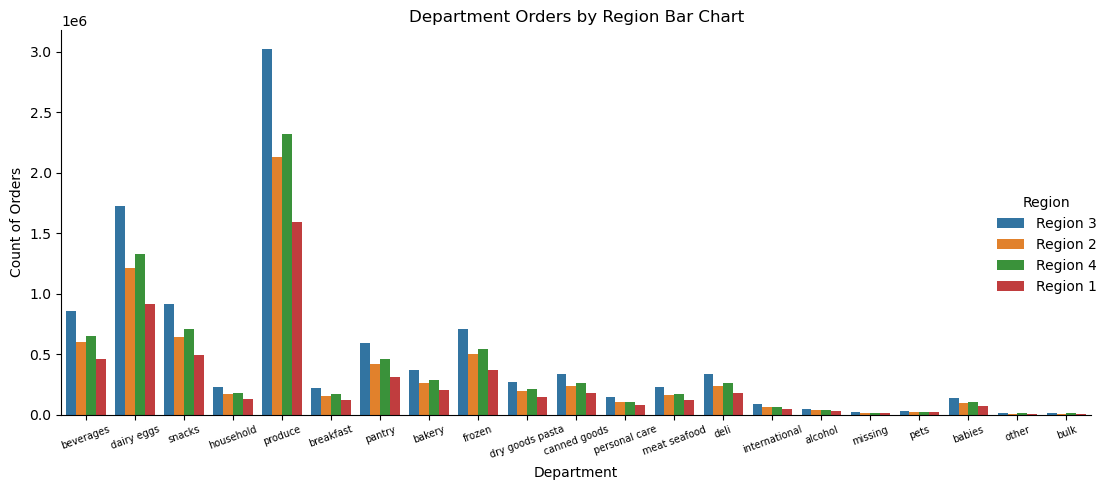

In [11]:
# bar chart showing counts for department IDs for all users by region

r_dept_bar = sns.catplot(data=df_5, kind="count", x="department", hue= "Region", aspect = 2)
plt.xticks(rotation = 20, fontsize=7)
plt.xlabel('Department')
plt.ylabel('Count of Orders')
plt.title('Department Orders by Region Bar Chart')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Customer Loyalty Status by Region Bar Chart')

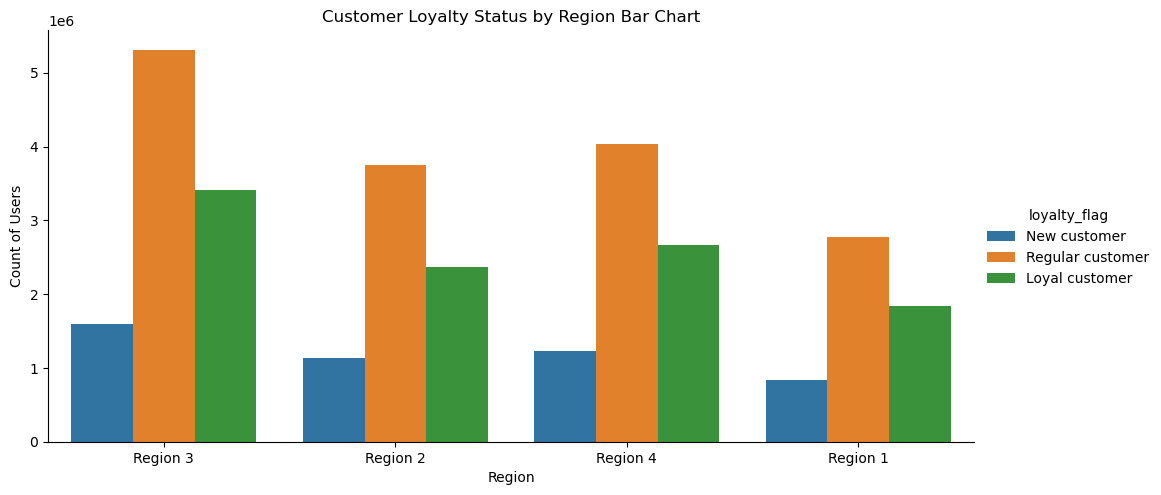

In [75]:
# bar chart showing counts of loyalty flags for all users by region

r_loyal_bar = sns.catplot(data=df_5, kind = 'count', x="Region", hue="loyalty_flag", aspect = 2)
plt.xlabel('Region')
plt.ylabel('Count of Users')
plt.title('Customer Loyalty Status by Region Bar Chart')

# 10. Export data and visuals

In [21]:
# final data frame

full_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'full_merge.pkl'))

In [18]:
r_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'r_dept_bar.png'))

In [19]:
dept_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_age_bar.png'))

In [20]:
dept_parent_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_parent_bar.png'))

In [ ]:
time_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'time_age_bar.png'))

In [ ]:
time_parent_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'time_parent_bar.png'))

In [ ]:
time_yn_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'time_yn_bar.png'))

In [ ]:
DOW_parent_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'DOW_parent_bar.png'))

In [ ]:
DOW_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'DOW_age_bar.png'))

In [ ]:
inc_allage_box.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'inc_allage_box.png'))

In [ ]:
r_loyal_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'r_loyal_bar.png'))

In [21]:
dept_loyal_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_loyal_bar.png'))

In [22]:
dept_fam_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_fam_bar.png'))

In [ ]:
parent_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'parent_age_bar.png'))

In [6]:
dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_bar.png'))

In [ ]:
loyal_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyal_bar.png'))